In [21]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob

In [22]:

# Step 1: Load the dataset
df = pd.read_csv(r"C:\Users\Hemanth\Desktop\Anudip Foundation\Anudip Project\datasets\tweets.csv", encoding="ISO-8859-1")
df.head()

,Tweet_ID,SentimentText,Hashtags,Retweets,Likes,Timestamp
0,1,Electric cars are revolutionizing transportati...,"['#EV', '#Sustainable']",151,787,2025-03-09 03:28:41.794731
1,2,Amazing food at this new restaurant! #Foodie #...,"['#Foodie', '#Delicious']",453,926,2025-03-05 03:28:41.794749
2,3,Just saw a fantastic movie! Highly recommend. ...,"['#Movies', '#Entertainment']",471,318,2025-03-19 03:28:41.794763
3,4,Python is such a powerful language! #Coding #P...,"['#Coding', '#Python']",389,175,2025-03-04 03:28:41.794771
4,5,Just saw a fantastic movie! Highly recommend. ...,"['#Movies', '#Entertainment']",458,178,2025-03-12 03:28:41.794778


In [23]:
# Step 2: Extract hashtags from tweets using regex
def extract_hashtags(text):
    return re.findall(r"#\w+", str(text))  # Finds words starting with #

df["hashtags"] = df["SentimentText"].apply(extract_hashtags)  # Apply function to extract hashtags
df = df[df["hashtags"].apply(len) > 0]  # Remove tweets without hashtags

In [24]:
# Step 3: Count hashtag frequency
all_hashtags = [hashtag for hashtags in df["hashtags"] for hashtag in hashtags]  # Flatten list
hashtag_counts = Counter(all_hashtags)  # Count occurrences of each hashtag
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=["Hashtag", "Count"])  # Convert to DataFrame
hashtag_df = hashtag_df.sort_values(by="Count", ascending=False)  # Sort by frequency


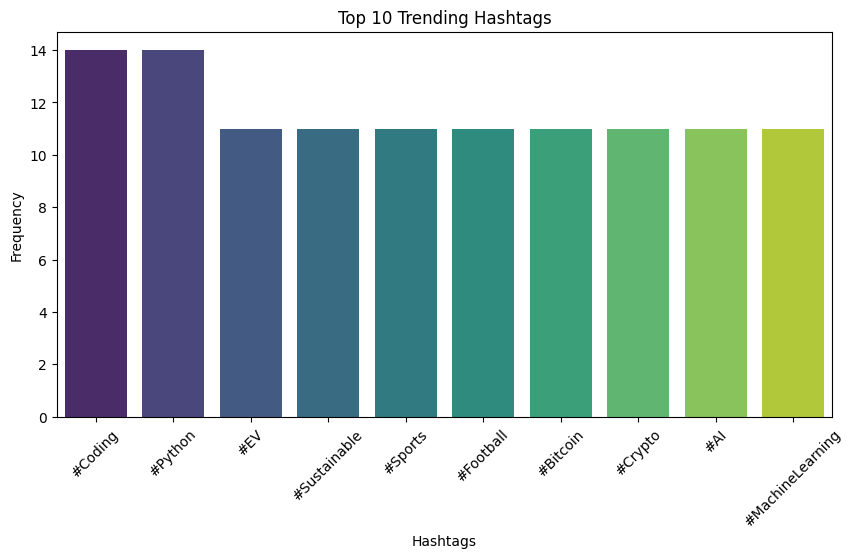

In [25]:
# Step 4: Visualize top 10 hashtags using bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=hashtag_df["Hashtag"][:10], 
            y=hashtag_df["Count"][:10], 
            hue=hashtag_df["Hashtag"][:10],  # Assign x-axis variable to hue
            palette="viridis", 
            legend=False)  # Disable legend , Bar chart
plt.xticks(rotation=45)
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.title("Top 10 Trending Hashtags")
plt.show()

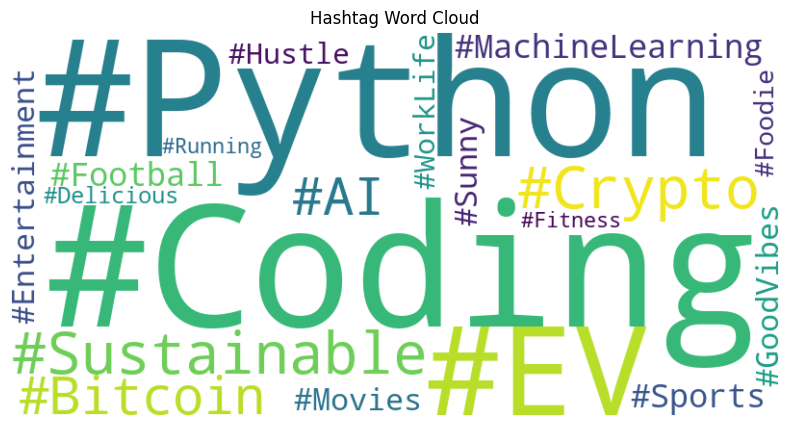

In [26]:
# Step 5: Generate a word cloud to visualize hashtag trends
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(hashtag_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Hashtag Word Cloud")
plt.show()


In [27]:
# Step 6: Engagement Analysis (Likes + Retweets)
def calculate_engagement(row):
    return row["Retweets"] + row["Likes"]  # Sum of likes and retweets

df["Engagement"] = df.apply(calculate_engagement, axis=1)  # Apply function to dataset


In [28]:
# Step 7: Aggregate engagement per hashtag
hashtag_engagement = {}
for index, row in df.iterrows():  # Iterate through dataset
    for hashtag in row["hashtags"]:
        if hashtag in hashtag_engagement:
            hashtag_engagement[hashtag] += row["Engagement"]  # Add engagement
        else:
            hashtag_engagement[hashtag] = row["Engagement"]

# Convert engagement data into DataFrame and sort
hashtag_engagement_df = pd.DataFrame(hashtag_engagement.items(), columns=["Hashtag", "Engagement"])
hashtag_engagement_df = hashtag_engagement_df.sort_values(by="Engagement", ascending=False)

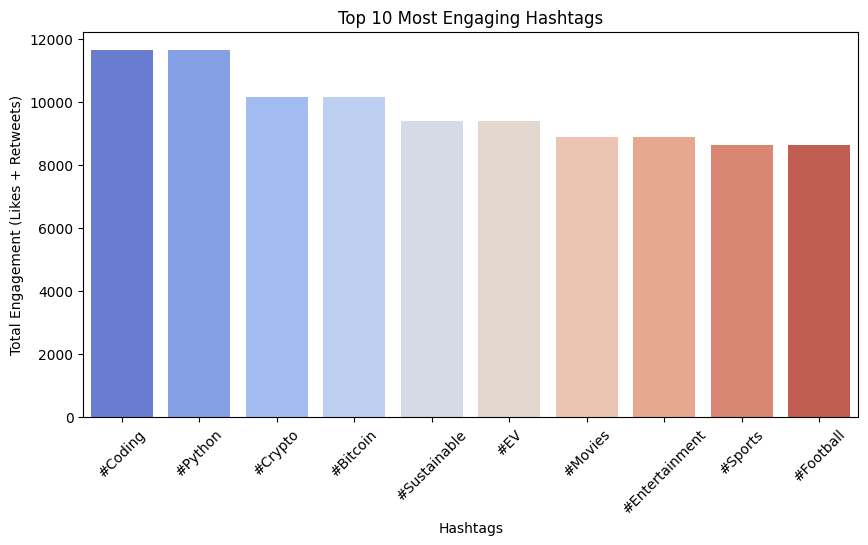

In [29]:
# Step 8: Visualizing most engaging hashtags
plt.figure(figsize=(10, 5))
sns.barplot(x=hashtag_engagement_df["Hashtag"][:10], 
            y=hashtag_engagement_df["Engagement"][:10], 
            hue=hashtag_engagement_df["Hashtag"][:10],  # Assign x variable to hue
            palette="coolwarm", 
            legend=False)  # Disable legend
plt.xticks(rotation=45)
plt.xlabel("Hashtags")
plt.ylabel("Total Engagement (Likes + Retweets)")
plt.title("Top 10 Most Engaging Hashtags")
plt.show()

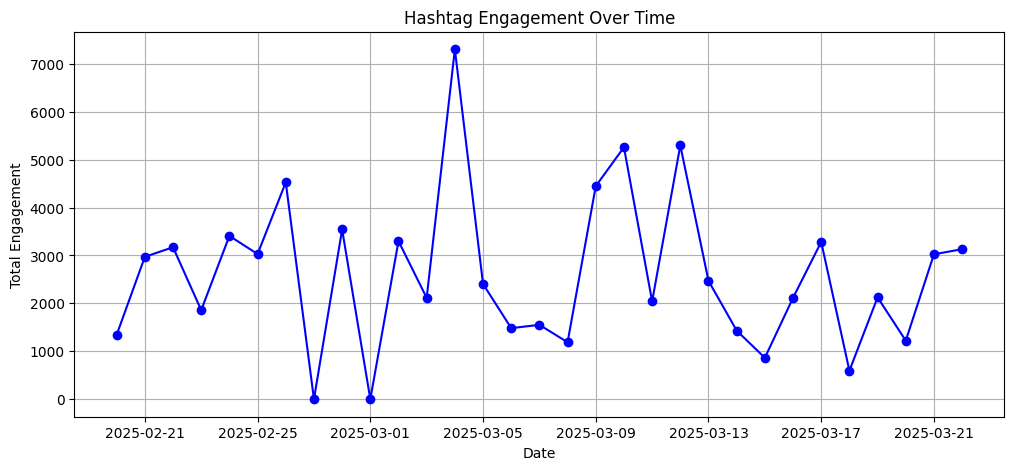

In [30]:
# Step 9: Time-based trend analysis
df["Timestamp"] = pd.to_datetime(df["Timestamp"])  # Convert timestamp to datetime format
df.set_index("Timestamp", inplace=True)  # Set timestamp as index

# Aggregate engagement over time (daily)
hashtag_time_series = df.resample("D")["Engagement"].sum()

# Plot trend over time
plt.figure(figsize=(12, 5))
plt.plot(hashtag_time_series, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Engagement")
plt.title("Hashtag Engagement Over Time")
plt.grid()
plt.show()

In [31]:
# Step 10: Sentiment Analysis (Positive, Negative, Neutral)
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Analyze text sentiment
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

df["Sentiment"] = df["SentimentText"].apply(get_sentiment)  # Apply function to dataset

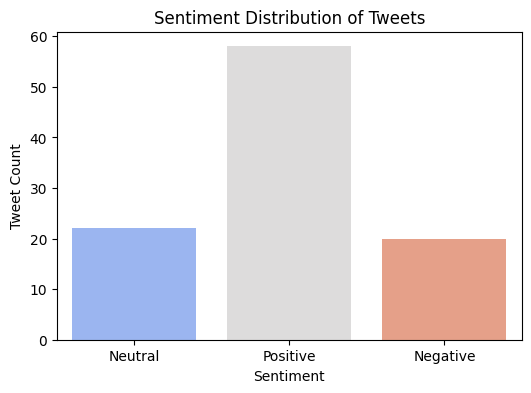

In [32]:
# Step 11: Visualizing sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], 
              hue=df["Sentiment"],  # Assign x variable to hue
              palette="coolwarm", 
              legend=False)  # Disable legend, # Bar chart for sentiment categories
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution of Tweets")
plt.show()

In [33]:
# Step 12: Conclusion and Summary
print("Insights:")
print("- Top trending hashtags based on frequency are:")
print(hashtag_df.head(10))
print()
print("- Top engaging hashtags based on total likes and retweets are:")
print(hashtag_engagement_df.head(10))
print("- Sentiment analysis shows tweet distribution among Positive, Negative, and Neutral categories.")


Insights:
- Top trending hashtags based on frequency are:
             Hashtag  Count
6            #Coding     14
7            #Python     14
0                #EV     11
1       #Sustainable     11
16           #Sports     11
17         #Football     11
9           #Bitcoin     11
8            #Crypto     11
14               #AI     11
15  #MachineLearning     11

- Top engaging hashtags based on total likes and retweets are:
           Hashtag  Engagement
6          #Coding       11652
7          #Python       11652
8          #Crypto       10170
9         #Bitcoin       10170
1     #Sustainable        9389
0              #EV        9389
4          #Movies        8885
5   #Entertainment        8885
16         #Sports        8626
17       #Football        8626
- Sentiment analysis shows tweet distribution among Positive, Negative, and Neutral categories.
